<a href="https://colab.research.google.com/github/ginoasuncion/emotive-currents/blob/issue-4-initial-eda/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# Setting up the Environment

In [ ]:
from google.colab import auth

auth.authenticate_user()

In [16]:
!git clone https://github.com/ginoasuncion/emotive-currents.git
%cd emotive-currents

!pip install uv
!uv sync --dev
!uv run dvc pull

Cloning into 'emotive-currents'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 99 (delta 29), reused 84 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 317.92 KiB | 5.48 MiB/s, done.
Resolving deltas: 100% (29/29), done.
/content/emotive-currents
Using CPython 3.11.13 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Resolved 277 packages in 1ms
   Building emotive-currents @ file:///content/emotive-currents
   Building emotive-currents @ file:///content/emotive-currents
⠙ Preparing packages... (0/87)
   Building emotive-currents @ file:///content/emotive-currents
⠙ Preparing packages... (0/87)
   Building emotive-currents @ file:///content/emotive-currents
⠙ Preparing packages... (0/87)
   Building emotive-currents @ file:///content/emotive-currents
⠙ Preparing packages... (0/87)
billiard             ------------------------------     0 B/84

# Load Data and Basic Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use("default")
sns.set_palette("husl")

print("📊 Loading GoEmotions processed data...")

# Load parquet files
train_df = pd.read_parquet("data/processed/train.parquet")
val_df = pd.read_parquet("data/processed/validation.parquet")
test_df = pd.read_parquet("data/processed/test.parquet")

# Load emotion mapping
with open("data/processed/emotion_mapping.json", "r") as f:
    emotion_mapping = json.load(f)

emotions = emotion_mapping["emotions"]

print(f"✅ Data loaded successfully!")
print(f"   Train: {len(train_df):,} samples")
print(f"   Validation: {len(val_df):,} samples")
print(f"   Test: {len(test_df):,} samples")
print(f"   Emotions: {len(emotions)} labels")
print(f"\n📋 Train columns: {list(train_df.columns)}")
print(f"🎭 Emotions: {emotions}")

📊 Loading GoEmotions processed data...
✅ Data loaded successfully!
   Train: 43,410 samples
   Validation: 5,426 samples
   Test: 5,427 samples
   Emotions: 27 labels

📋 Train columns: ['text', 'labels', 'id', 'emotion_labels', 'emotion_admiration', 'emotion_amusement', 'emotion_anger', 'emotion_annoyance', 'emotion_approval', 'emotion_caring', 'emotion_confusion', 'emotion_curiosity', 'emotion_desire', 'emotion_disappointment', 'emotion_disapproval', 'emotion_disgust', 'emotion_embarrassment', 'emotion_excitement', 'emotion_fear', 'emotion_gratitude', 'emotion_grief', 'emotion_joy', 'emotion_love', 'emotion_nervousness', 'emotion_optimism', 'emotion_pride', 'emotion_realization', 'emotion_relief', 'emotion_remorse', 'emotion_sadness', 'emotion_surprise', 'emotion_count']
🎭 Emotions: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', '

# Load Data and Basic Setup

In [18]:
print("📊 BASIC DATASET STATISTICS")
print("=" * 50)

# Add text analysis columns
for split_name, df in [("Train", train_df), ("Validation", val_df), ("Test", test_df)]:
    df["text_length"] = df["text"].str.len()
    df["word_count"] = df["text"].str.split().str.len()

    print(f"\n{split_name} Split:")
    print(f"   Samples: {len(df):,}")
    print(f"   Avg text length: {df['text_length'].mean():.1f} chars")
    print(f"   Median text length: {df['text_length'].median():.1f} chars")
    print(f"   Avg word count: {df['word_count'].mean():.1f} words")
    print(
        f"   Text length range: {df['text_length'].min()}-{df['text_length'].max()} chars"
    )

# Overall statistics
total_samples = len(train_df) + len(val_df) + len(test_df)
print(f"\n📈 Overall:")
print(f"   Total samples: {total_samples:,}")
print(f"   Train split: {len(train_df) / total_samples * 100:.1f}%")
print(f"   Val split: {len(val_df) / total_samples * 100:.1f}%")
print(f"   Test split: {len(test_df) / total_samples * 100:.1f}%")

📊 BASIC DATASET STATISTICS

Train Split:
   Samples: 43,410
   Avg text length: 68.3 chars
   Median text length: 65.0 chars
   Avg word count: 12.8 words
   Text length range: 2-703 chars

Validation Split:
   Samples: 5,426
   Avg text length: 68.2 chars
   Median text length: 64.0 chars
   Avg word count: 12.8 words
   Text length range: 5-187 chars

Test Split:
   Samples: 5,427
   Avg text length: 67.8 chars
   Median text length: 65.0 chars
   Avg word count: 12.7 words
   Text length range: 5-184 chars

📈 Overall:
   Total samples: 54,263
   Train split: 80.0%
   Val split: 10.0%
   Test split: 10.0%


# Sample Data Exploration

In [20]:
print("📝 SAMPLE DATA EXPLORATION")
print("=" * 50)

# Show sample texts
print("\n🔍 Sample texts from training set:")
for i in range(5):
    row = train_df.iloc[i]
    text_preview = row["text"][:120] + "..." if len(row["text"]) > 120 else row["text"]
    print(f"\n{i + 1}. Text: '{text_preview}'")
    print(f"   Length: {len(row['text'])} chars, {len(row['text'].split())} words")
    if "emotion_names" in row:
        print(f"   Emotions: {row['emotion_names']}")

# Show text length extremes
print(f"\n📏 TEXT LENGTH EXTREMES:")
longest_idx = train_df["text_length"].idxmax()
shortest_idx = train_df["text_length"].idxmin()

longest_text = train_df.loc[longest_idx]
shortest_text = train_df.loc[shortest_idx]

print(f"\nLongest text ({longest_text['text_length']} chars):")
print(f"   '{longest_text['text'][:200]}...'")

print(f"\nShortest text ({shortest_text['text_length']} chars):")
print(f"   '{shortest_text['text']}'")

📝 SAMPLE DATA EXPLORATION

🔍 Sample texts from training set:

1. Text: 'My favourite food is anything I didn't have to cook myself.'
   Length: 59 chars, 11 words

2. Text: 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead'
   Length: 112 chars, 20 words

3. Text: 'WHY THE FUCK IS BAYLESS ISOING'
   Length: 30 chars, 6 words

4. Text: 'To make her feel threatened'
   Length: 27 chars, 5 words

5. Text: 'Dirty Southern Wankers'
   Length: 22 chars, 3 words

📏 TEXT LENGTH EXTREMES:

Longest text (703 chars):
   'This person is the smartest person to play town of salem literally 9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999910000000000000000000000000000000000000000000...'

Shortest text (2 chars):
   'XD'


# Analysis with Binary Columns

In [23]:
print("🎭 EMOTION DATA ANALYSIS")
print("=" * 50)

# Get all binary emotion columns
emotion_binary_cols = [
    col
    for col in train_df.columns
    if col.startswith("emotion_") and col not in ["emotion_labels", "emotion_count"]
]
print(f"Found {len(emotion_binary_cols)} emotion columns")


# Convert binary columns to emotion lists
def binary_to_emotions(row):
    active_emotions = []
    for i, col in enumerate(emotion_binary_cols):
        if row[col] == 1:
            # Extract emotion name from column (remove 'emotion_' prefix)
            emotion_name = col.replace("emotion_", "")
            active_emotions.append(emotion_name)
    return active_emotions


train_df["emotion_lists"] = train_df[emotion_binary_cols].apply(
    binary_to_emotions, axis=1
)

print(f"✅ Emotion processing complete!")
print(f"📊 Emotion Statistics (Training Set):")
print(f"   Average emotions per sample: {train_df['emotion_count'].mean():.2f}")
print(f"   Median emotions per sample: {train_df['emotion_count'].median():.1f}")
print(f"   Max emotions per sample: {train_df['emotion_count'].max()}")
print(f"   Min emotions per sample: {train_df['emotion_count'].min()}")
print(f"   Samples with no emotions: {(train_df['emotion_count'] == 0).sum()}")

# Verify our processing matches the existing emotion_count
calculated_counts = train_df["emotion_lists"].apply(len)
matches = (calculated_counts == train_df["emotion_count"]).all()
print(f"   ✅ Emotion count verification: {'Passed' if matches else 'Failed'}")

# Show some examples
print(f"\n📝 Sample emotion data:")
for i in range(5):
    row = train_df.iloc[i]
    print(
        f"   Sample {i + 1}: {row['emotion_lists']} ({len(row['emotion_lists'])} emotions)"
    )

🎭 EMOTION DATA ANALYSIS
Found 27 emotion columns
✅ Emotion processing complete!
📊 Emotion Statistics (Training Set):
   Average emotions per sample: 0.85
   Median emotions per sample: 1.0
   Max emotions per sample: 5
   Min emotions per sample: 0
   Samples with no emotions: 12823
   ✅ Emotion count verification: Passed

📝 Sample emotion data:
   Sample 1: [] (0 emotions)
   Sample 2: [] (0 emotions)
   Sample 3: ['anger'] (1 emotions)
   Sample 4: ['fear'] (1 emotions)
   Sample 5: ['annoyance'] (1 emotions)


# Frequency Analysis

In [24]:
print("🔥 EMOTION FREQUENCY ANALYSIS")
print("=" * 50)

# Method 1: Count from binary columns (more efficient)
emotion_frequencies = {}
for col in emotion_binary_cols:
    emotion_name = col.replace("emotion_", "")
    emotion_frequencies[emotion_name] = train_df[col].sum()

# Sort by frequency
sorted_emotions = sorted(emotion_frequencies.items(), key=lambda x: x[1], reverse=True)

print(f"Total emotion instances: {sum(emotion_frequencies.values()):,}")
print(f"Unique emotions: {len(emotion_frequencies)}")

print(f"\n🔥 TOP 15 MOST COMMON EMOTIONS:")
for i, (emotion, count) in enumerate(sorted_emotions[:15], 1):
    percentage = (count / len(train_df)) * 100
    print(f"{i:2d}. {emotion:15s}: {count:6,} ({percentage:5.1f}%)")

print(f"\n🔻 15 LEAST COMMON EMOTIONS:")
for i, (emotion, count) in enumerate(sorted_emotions[-15:], 1):
    percentage = (count / len(train_df)) * 100
    print(f"{i:2d}. {emotion:15s}: {count:6,} ({percentage:5.1f}%)")

# Class imbalance analysis
most_common_count = sorted_emotions[0][1]
least_common_count = sorted_emotions[-1][1]
imbalance_ratio = most_common_count / least_common_count

print(f"\n⚖️ CLASS IMBALANCE:")
print(
    f"   Most common ({sorted_emotions[0][0]}): {most_common_count:,} instances ({most_common_count / len(train_df) * 100:.1f}%)"
)
print(
    f"   Least common ({sorted_emotions[-1][0]}): {least_common_count:,} instances ({least_common_count / len(train_df) * 100:.1f}%)"
)
print(f"   Imbalance ratio: {imbalance_ratio:.1f}:1")

🔥 EMOTION FREQUENCY ANALYSIS
Total emotion instances: 36,884
Unique emotions: 27

🔥 TOP 15 MOST COMMON EMOTIONS:
 1. admiration     :  4,130 (  9.5%)
 2. approval       :  2,939 (  6.8%)
 3. gratitude      :  2,662 (  6.1%)
 4. annoyance      :  2,470 (  5.7%)
 5. amusement      :  2,328 (  5.4%)
 6. curiosity      :  2,191 (  5.0%)
 7. love           :  2,086 (  4.8%)
 8. disapproval    :  2,022 (  4.7%)
 9. optimism       :  1,581 (  3.6%)
10. anger          :  1,567 (  3.6%)
11. joy            :  1,452 (  3.3%)
12. confusion      :  1,368 (  3.2%)
13. sadness        :  1,326 (  3.1%)
14. disappointment :  1,269 (  2.9%)
15. realization    :  1,110 (  2.6%)

🔻 15 LEAST COMMON EMOTIONS:
 1. sadness        :  1,326 (  3.1%)
 2. disappointment :  1,269 (  2.9%)
 3. realization    :  1,110 (  2.6%)
 4. caring         :  1,087 (  2.5%)
 5. surprise       :  1,060 (  2.4%)
 6. excitement     :    853 (  2.0%)
 7. disgust        :    793 (  1.8%)
 8. desire         :    641 (  1.5%)
 9. fea

# Distribution Visualization

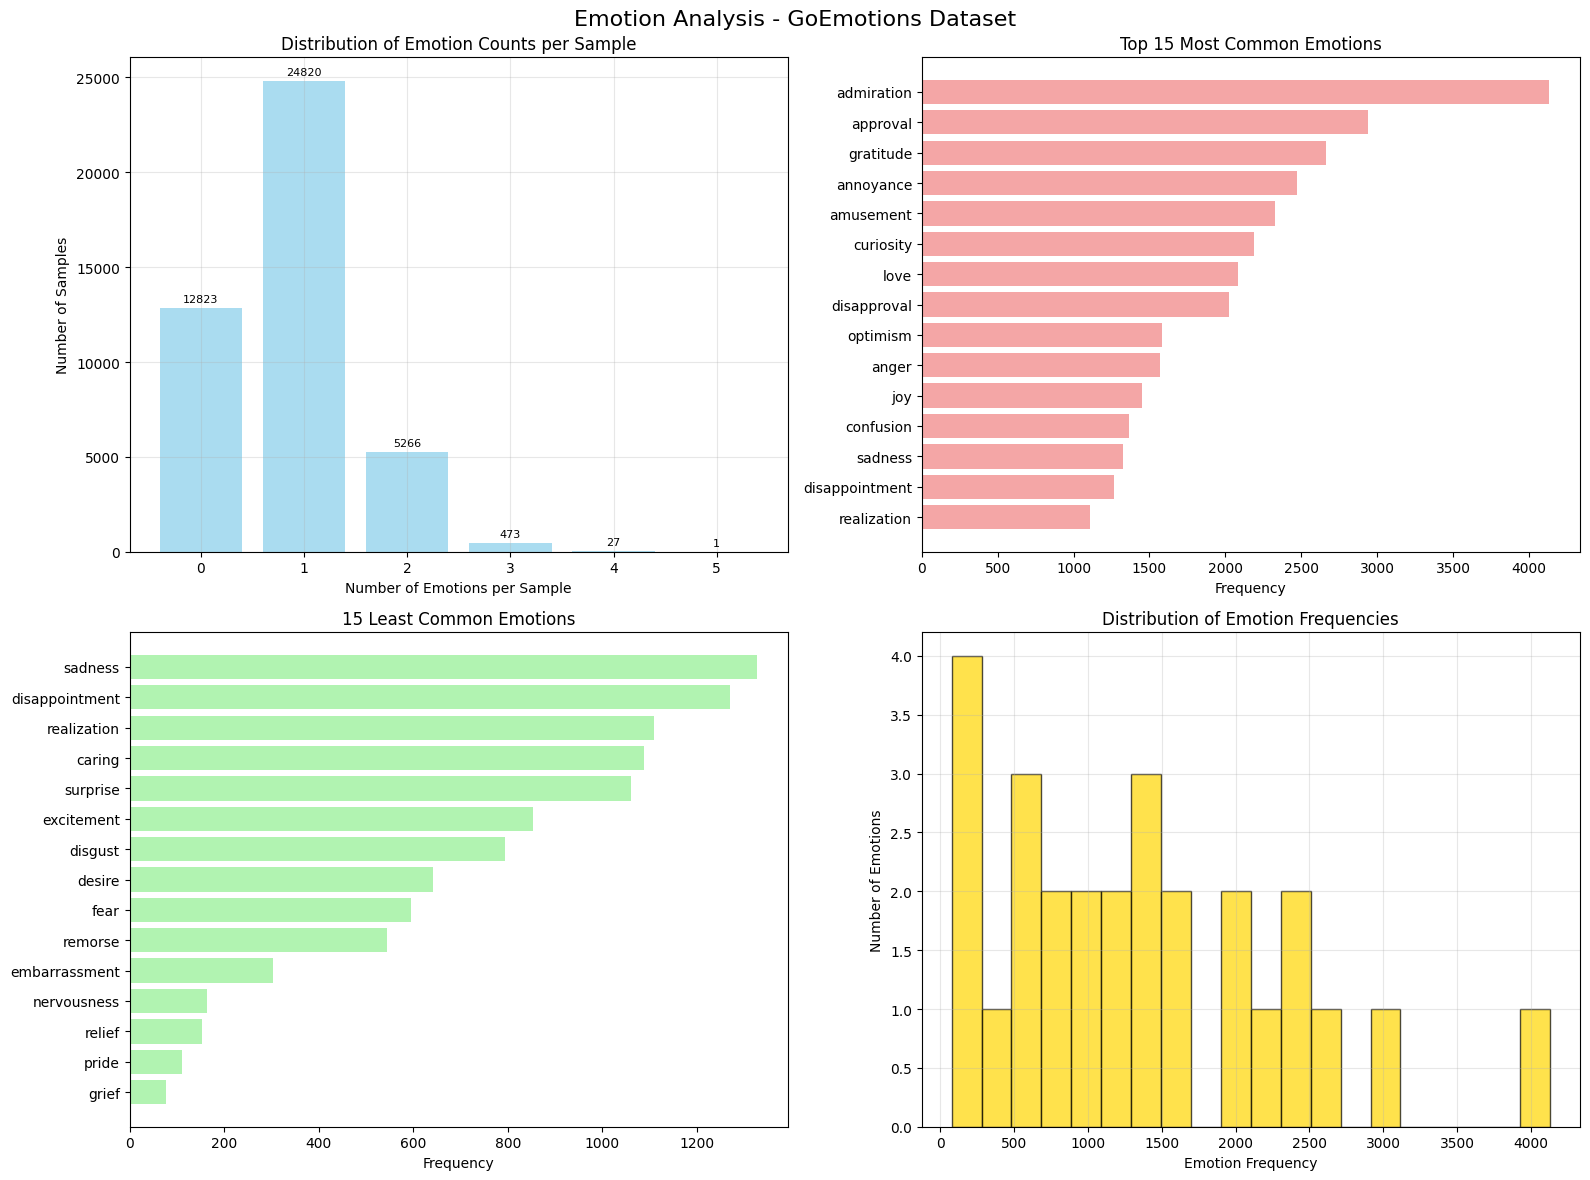

📊 Key observations:
   Most balanced emotion count: 1 emotions per sample
   24,820 samples have exactly 1 emotion
   501 samples have 3+ emotions


In [25]:
# Create emotion frequency visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Emotion Analysis - GoEmotions Dataset", fontsize=16)

# 1. Emotion count per sample distribution
emotion_count_dist = train_df["emotion_count"].value_counts().sort_index()
axes[0, 0].bar(
    emotion_count_dist.index, emotion_count_dist.values, alpha=0.7, color="skyblue"
)
axes[0, 0].set_xlabel("Number of Emotions per Sample")
axes[0, 0].set_ylabel("Number of Samples")
axes[0, 0].set_title("Distribution of Emotion Counts per Sample")
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(emotion_count_dist.values):
    axes[0, 0].text(
        emotion_count_dist.index[i],
        v + len(train_df) * 0.005,
        str(v),
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 2. Top 15 emotions bar plot
top_15_emotions = dict(sorted_emotions[:15])
emotion_names = list(top_15_emotions.keys())
emotion_counts = list(top_15_emotions.values())

axes[0, 1].barh(emotion_names, emotion_counts, alpha=0.7, color="lightcoral")
axes[0, 1].set_xlabel("Frequency")
axes[0, 1].set_title("Top 15 Most Common Emotions")
axes[0, 1].invert_yaxis()

# 3. Bottom 15 emotions bar plot
bottom_15_emotions = dict(sorted_emotions[-15:])
bottom_names = list(bottom_15_emotions.keys())
bottom_counts = list(bottom_15_emotions.values())

axes[1, 0].barh(bottom_names, bottom_counts, alpha=0.7, color="lightgreen")
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_title("15 Least Common Emotions")
axes[1, 0].invert_yaxis()

# 4. Emotion frequency distribution (histogram)
frequencies = list(emotion_frequencies.values())
axes[1, 1].hist(frequencies, bins=20, alpha=0.7, color="gold", edgecolor="black")
axes[1, 1].set_xlabel("Emotion Frequency")
axes[1, 1].set_ylabel("Number of Emotions")
axes[1, 1].set_title("Distribution of Emotion Frequencies")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Key observations:")
print(
    f"   Most balanced emotion count: {emotion_count_dist.idxmax()} emotions per sample"
)
print(f"   {(train_df['emotion_count'] == 1).sum():,} samples have exactly 1 emotion")
print(f"   {(train_df['emotion_count'] >= 3).sum():,} samples have 3+ emotions")

 # Interesting Sample Examples

In [26]:
print("🎯 INTERESTING SAMPLE EXAMPLES")
print("=" * 50)

# Samples with most emotions
print(f"🔥 SAMPLES WITH MOST EMOTIONS:")
most_emotional = train_df.nlargest(5, "emotion_count")
for i, (idx, row) in enumerate(most_emotional.iterrows(), 1):
    text_preview = row["text"][:150] + "..." if len(row["text"]) > 150 else row["text"]
    print(f"\n{i}. Text: '{text_preview}'")
    print(
        f"   Emotions ({len(row['emotion_lists'])}): {', '.join(row['emotion_lists'])}"
    )
    print(f"   Length: {row['text_length']} chars")

# Samples with single emotions
print(f"\n🎯 SAMPLES WITH SINGLE EMOTIONS:")
single_emotion_samples = train_df[train_df["emotion_count"] == 1].sample(
    5, random_state=42
)
for i, (idx, row) in enumerate(single_emotion_samples.iterrows(), 1):
    text_preview = row["text"][:150] + "..." if len(row["text"]) > 150 else row["text"]
    print(f"\n{i}. Text: '{text_preview}'")
    print(f"   Emotion: {row['emotion_lists'][0]}")
    print(f"   Length: {row['text_length']} chars")

# Examples of specific emotions (most common ones)
print(f"\n😊 EXAMPLES OF SPECIFIC EMOTIONS:")
target_emotions = ["joy", "anger", "sadness", "fear", "love", "admiration"]
for emotion in target_emotions:
    if f"emotion_{emotion}" in train_df.columns:
        emotion_samples = train_df[train_df[f"emotion_{emotion}"] == 1]
        if len(emotion_samples) > 0:
            sample = emotion_samples.sample(1, random_state=42).iloc[0]
            text_preview = (
                sample["text"][:120] + "..."
                if len(sample["text"]) > 120
                else sample["text"]
            )
            print(f"   {emotion:12s}: '{text_preview}'")

🎯 INTERESTING SAMPLE EXAMPLES
🔥 SAMPLES WITH MOST EMOTIONS:

1. Text: 'Yeah I probably would've started crying on the spot. Loud, sudden and especially shrill noises are extremely *"cringey"* and uncomfortable and stressf...'
   Emotions (5): disappointment, embarrassment, fear, nervousness, sadness
   Length: 152 chars

2. Text: 'Tournament was a blast met some really cool people loved it all. Thanks for holding it. Would love to do it again someday'
   Emotions (4): admiration, desire, gratitude, joy
   Length: 121 chars

3. Text: 'Holy shit was that the one guy that supported remain? I didn't know we had a celebrity on this board.'
   Emotions (4): confusion, curiosity, disappointment, surprise
   Length: 101 chars

4. Text: 'I know I haven't been myself lately but listen! I can do better and I can change!'
   Emotions (4): approval, desire, optimism, realization
   Length: 81 chars

5. Text: 'It's not his fault, it's your wife's. Shes the one you need to be pissed at'
   Emotions (